In [1]:
#brew install gcc@8
#git clone --recursive https://github.com/dmlc/xgboost
#cd xgboost
#vi config.mk
#uncomment and change to 
#export CC = gcc-8
#export CXX = g++-8
#change Makefile
#export CC = $(if $(shell which clang), clang, gcc-8)
#export CXX = $(if $(shell which clang++), clang++, g++-8)
#make clean_all && make -j4
#cd python-package; python setup.py install

In [91]:
#import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBRegressor
import pickle

In [69]:
df = pd.read_csv('../data/processed/kaggle_sample_train.csv')
df_type = pd.read_csv('../data/processed/kaggle_sample_type.csv')

In [70]:
#Function to get target variable
def get_target(df,df_type):
    for c in df:
        if (column_type(c,df_type) == 'Flag_Continuous' or column_type(c,df_type) == 'Flag_Categorical'):
            return(c)

In [71]:
# funtion to get column type
def column_type(column_name,df_type):
    return (df_type.loc[df_type['Variable'] == column_name, 'Type'].iloc[0])

In [72]:
target_name = get_target(df,df_type)
X = df.drop(columns = target_name)
y = df[target_name]

In [7]:
X.head()

,Vehicle,Calendar_Year,Model_Year,Blind_Make,Cat1,Cat2,Cat3,Cat6,Cat8,Cat9,...,Cat12,OrdCat,NVCat,NVVar1,NVVar2,NVVar3,Var2_Var4,Var1_Var5,Var3_Var6,Var7_Var8_NVVar4
0,1.155510,1,0,0,9,2,2,2,0,0,...,3,4,0,-0.262917,-0.323505,-0.308787,-1.217772,-1.335219,-0.334649,0.533280
1,1.155510,1,0,0,8,2,5,1,1,1,...,3,5,0,-0.262917,-0.323505,-0.308787,-0.605128,-0.759371,-0.997204,-0.303714
2,-1.132747,1,0,1,8,2,5,2,1,1,...,3,2,0,-0.262917,-0.323505,-0.308787,2.531610,1.467012,1.936348,-1.604703
3,-1.132747,0,0,1,8,2,5,2,1,1,...,5,2,0,-0.262917,-0.323505,-0.308787,2.531610,1.467012,1.936348,-1.604703
4,1.155510,1,0,0,2,2,4,4,1,1,...,5,5,0,-0.262917,-0.323505,-0.308787,-2.503707,-0.702542,-2.434812,3.104985


In [8]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Claim_Amount, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

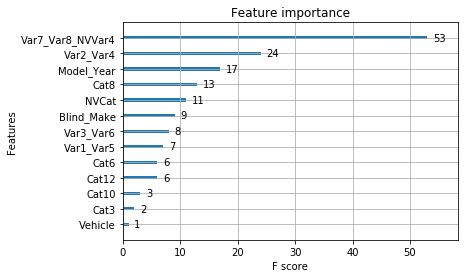

In [83]:
model = XGBRegressor(max_depth=1, learning_rate=0.1, n_estimators=160, silent=True, objective='reg:linear',eval_metric='rmse')
model.fit(X_train, y_train)

# prediction
pred_test = model.predict(X_test)

# important features
plot_importance(model)
plt.show() 

In [84]:
print('MSE:', mean_squared_error(y_test, pred_test))
print('R Square:', r2_score(y_test, pred_test))

MSE: 831.867686609425
R Square: -0.010873992732412407


In [87]:
#Set the different values of parameters to be tested
parameters = {'max_depth':[1,3,5,7,9],'learning_rate':[0.1],'n_estimators':[1,3,5,10,50,100],'silent':['True'],'objective':['reg:linear'],'eval_metric':['rmse']}
model = xgb.XGBRegressor()
xgb_regressor = GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=5)
xgb_regressor.fit(X_train,y_train)
print(xgb_regressor.best_params_)
print(xgb_regressor.best_score_)


{'eval_metric': 'rmse', 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1, 'objective': 'reg:linear', 'silent': 'True'}
-0.0009697124676125047


In [88]:
predictions = xgb_regressor.predict(X_test)
predictions = pd.DataFrame(predictions)

In [89]:
predictions

,0
0,0.507121
1,0.507121
2,0.507121
3,0.507121
4,0.507121
5,0.507121
6,0.507121
7,0.507121
8,0.507121
9,0.507121


In [92]:
# save the model to disk
filename = '../models/XGBRegressor.sav'
pickle.dump(xgb_regressor, open(filename, 'wb'))

In [ ]:
"""
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
"""